In [1]:
import torch
from data_logger import DataLogger
from dqn_agent import Agent
from utils import *
from tqdm import tqdm

print(torch.cuda.is_available())

True


In [5]:
#Loading parameters
ep, lp, hp = get_params(gamename="mario") #params["environment"], params["logging"], params["hyperparameters"]
hp_algo = hp['dqn/ddqn']

In [6]:
env = get_env(game=ep["game"], level=ep["level"], action_space=ep["action_space"])
env = apply_wrappers(env, skip=ep["skip"], gray_scale=ep["gray_scale"], shape=tuple(ep["frame_shape"]), num_stack=ep["num_stack"])
next_state = env.reset()
print(next_state)

In [4]:
agent = Agent(env, batch_size=hp_algo["batch_size"], time_steps=hp_algo["time_steps"], buffer_size=hp_algo["buffer_size"], learning_rate=hp_algo["learning_rate"], observation_size=(ep["num_stack"],)+tuple(ep["frame_shape"]), action_size=get_action_space_size(env), 
              discount_factor=hp_algo["discount_factor"], model=hp_algo["model"], epsilon_min=hp_algo["exploration_final_eps"], exploration_fraction=hp_algo["exploration_fraction"], update_online_every=hp_algo["train_freq"],
              update_target_from_online_every=hp_algo["target_update_interval"], start_learning_after=hp_algo["learning_starts"])
logger = DataLogger(env, hp, agent, model=hp_algo["model"], name_logging="Normalization_NN_Own")

while logger.time_step_count < hp_algo["time_steps"]:
    state = env.reset()
    while True:
        #env.render()

        action_idx = agent.act(state)

        next_state, reward, done, info = env.step(action_idx)

        agent.append_experience_to_memory(state, next_state, action_idx, reward, done)
        
        loss = agent.learn()

        state = next_state        

        logger.time_step(reward, loss, n_time_steps_save_model=lp["n_time_steps_save_model"])

        if done or info['flag_get']:
            break

    logger.episode_step(info)

logger.close()

e:\10mociclo\Applied\RL_Sonic-TheHedgehog\dqn_agent.py:55: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:264.)
  state = torch.FloatTensor(state).cuda()


Model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\0.pth at step 0
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 1
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 2
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 3
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 8
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 9
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 14
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 20
Best model saved to logs\SuperMarioBros-1-1-v0\DDQN\Normalization_NN_Own\checkpoints\best_model.pth at episode 

In [5]:
env.close()

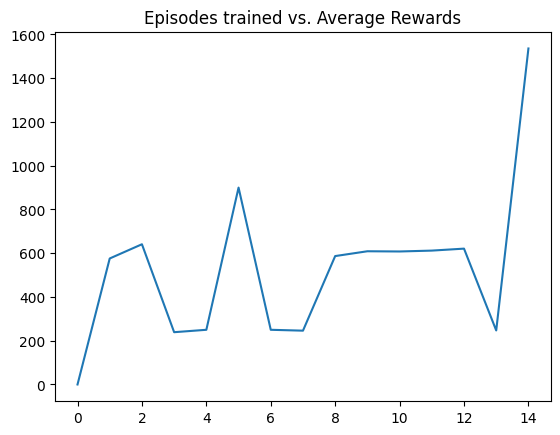

In [6]:
import pickle
with open(r"logs\SuperMarioBros-1-1-v0\DDQN\20240131132219\train\total_rewards", 'rb') as f:
    rews = pickle.load(f)
plot_average_reward(rews, title="Episodes trained vs. Average Rewards", n_average=1)

In [ ]:
#Testing trained model
env = get_env(game=ep["game"], level=ep["level"], action_space=ep["action_space"])
env = apply_wrappers(env, skip=ep["skip"], gray_scale=ep["gray_scale"], shape=ep["frame_shape"], num_stack=ep["num_stack"], buffer=ep["buffer"])

agent = Agent(env, batch_size=hp_algo["batch_size"], buffer_size=hp_algo["buffer_size"], learning_rate=hp_algo["learning_rate"], observation_size=(ep["num_stack"],)+tuple(ep["frame_shape"]), action_size=get_action_space_size(env), 
              discount_factor=hp_algo["discount_factor"], model=hp_algo["model"], epsilon_min=hp_algo["exploration_min"], epsilon_decay=hp_algo["exploration_decay"], update_online_every=hp_algo["train_freq"],
              update_target_from_online_every=hp_algo["target_update_interval"], start_learning_after=hp_algo["learning_starts"])
agent.load(r"logs\SuperMarioBros-1-1-v0\DDQN\20240129231225\checkpoints\best_model.pth")

Loading model at logs\SuperMarioBros-1-1-v0\DDQN\20240129231225\checkpoints\best_model.pth with exploration rate 0.02


In [ ]:
try:
    while True:
        time_stamp=0
        state = env.reset()
        while time_stamp<1e4:
            action_idx = agent.act(state)

            next_state, reward, done, info = env.step(get_action(action_idx, env))

            state = next_state

            env.render()
            
            time_stamp += 1

            if done or info["flag_get"]:
                break
except:
    env.close()